In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("factbook.db")

query1 = "SELECT * FROM sqlite_master WHERE type = 'table'"
pd.read_sql_query(query1, conn)



,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [5]:
query2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(query2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [7]:
query3 = "SELECT min(population), max(population), min(population_growth), max(population_growth) FROM facts"
pd.read_sql_query(query3, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [9]:
query4 = "SELECT name FROM facts WHERE population = 0"
query5 = "SELECT name FROM facts WHERE population = 7256490011"

pd.read_sql_query(query4, conn)


,name
0,Antarctica


In [10]:
pd.read_sql_query(query5, conn)

,name
0,World


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5964edb5c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5964dd5ef0>]], dtype=object)

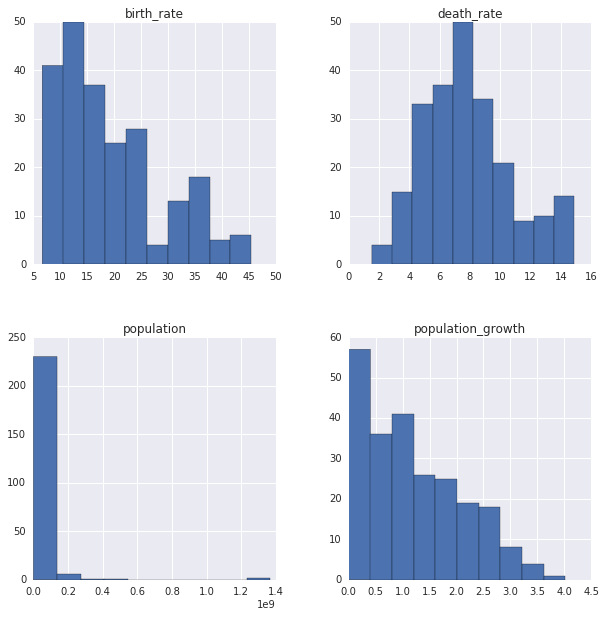

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

query6 = '''
SELECT population, population_growth, birth_rate, death_rate 
FROM facts
WHERE population != (SELECT min(population) FROM facts)
  AND population != (SELECT max(population) FROM facts)
'''

pd.read_sql_query(query6, conn).hist(ax=ax)

In [8]:
query7 = '''
SELECT name, population, area_land, CAST(population as float)/CAST(area_land as float) density
FROM facts 
ORDER BY density desc
LIMIT 10
'''

pd.read_sql_query(query7, conn)


,name,population,area_land,density
0,Macau,592731,28,21168.964286
1,Monaco,30535,2,15267.500000
2,Singapore,5674472,687,8259.784571
3,Hong Kong,7141106,1073,6655.271202
4,Gaza Strip,1869055,360,5191.819444
5,Gibraltar,29258,6,4876.333333
6,Bahrain,1346613,760,1771.859211
7,Maldives,393253,298,1319.640940
8,Malta,413965,316,1310.015823
9,Bermuda,70196,54,1299.925926


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5964989f98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f59647fd470>]], dtype=object)

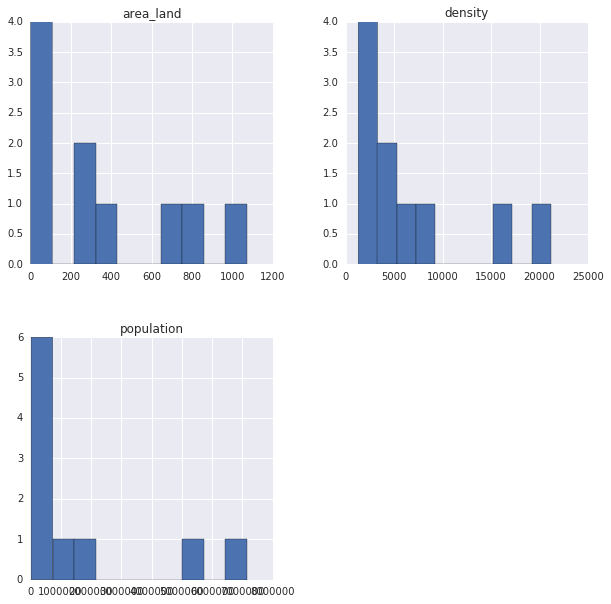

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pd.read_sql_query(query7, conn).hist(ax=ax)

In [12]:
query8 = '''
SELECT name, area_water, area_land, 
CAST(area_water as float)/CAST(area_land) water_to_land_ration
FROM facts
ORDER BY water_to_land_ratio desc
LIMIT 10
'''

pd.read_sql_query(query8, conn)

DatabaseError: Execution failed on sql '
SELECT name, area_water, area_land, CAST(area_water)/CAST(area_land) water_to_land_ration
FROM facts
ORDER BY water_to_land_ratio 
LIMIT 10
': near ")": syntax error